# Word Representation

In [ ]:
from gensim.models import Word2Vec
wv = api.load('word2vec-google-news-300')
model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=SEED)
model.wv.most_similar("trump")

NameError: ignored

## One Hot Encoding

In [ ]:
import numpy as np
docs = "Can I eat the Pizza".lower().split()
doc1 = set(docs)
doc1 = sorted(doc1)
print ("\nvalues: ", doc1)

integer_encoded = []
for i in docs:
    v = np.where( np.array(doc1) == i)[0][0]
    integer_encoded.append(v)
print ("\ninteger encoded: ",integer_encoded)

def get_vec(len_doc,word):
    empty_vector = [0] * len_doc
    vect = 0
    find = np.where( np.array(doc1) == word)[0][0]
    empty_vector[find] = 1
    return empty_vector

def get_matrix(doc1):
    mat = []
    len_doc = len(doc1)
    for i in docs:
        vec = get_vec(len_doc,i)
        mat.append(vec)
        
    return np.asarray(mat)

print ("\One Hot Encoding:")
print (get_matrix(doc1))
    


values:  ['can', 'eat', 'i', 'pizza', 'the']

integer encoded:  [0, 2, 1, 4, 3]
\One Hot Encoding:
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


## Bag of Words 

**In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text.**

  *— Page 65, Neural Network Methods in Natural Language Processing, 2017.*

**A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the words within the text, i.e. considering each word count as a feature.**

 * — Page 69, Neural Network Methods in Natural Language Processing, 2017.*

As the vocabulary size increases, so does the vector representation of documents.  It is called a “bag” of words, because any information about the order or structure of words in the document is discarded.



---



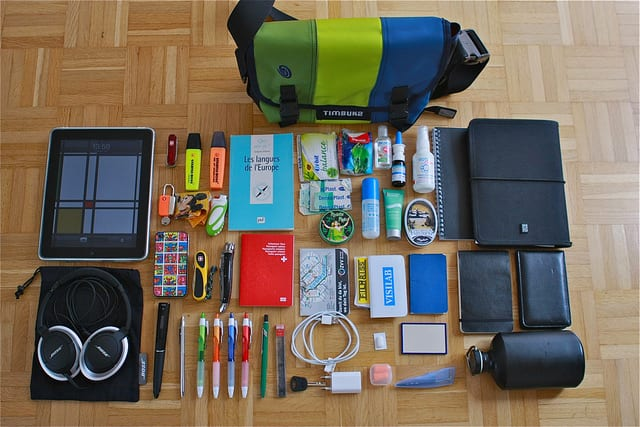

In [ ]:
from keras.preprocessing.text import Tokenizer
 
text = [
  'There was a man',
  'The man had a dog',
  'The dog and the man walked',
]
# using tokenizer 
model = Tokenizer()
model.fit_on_texts(text)
 
#print keys 
print(f'Key : {list(model.word_index.keys())}')
 
#create bag of words representation 
#ignore the first column
rep = model.texts_to_matrix(text, mode='count')
print(rep)

Key : ['man', 'the', 'a', 'dog', 'there', 'was', 'had', 'and', 'walked']
[[0. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 2. 0. 1. 0. 0. 0. 1. 1.]]


## N-Grams

A more sophisticated approach is to create a vocabulary of grouped words.

**An N-gram is an N-token sequence of words: a 2-gram (more commonly called a bigram) is a two-word sequence of words like “please turn”, “turn your”, or “your homework”, and a 3-gram (more commonly called a trigram) is a three-word sequence of words like “please turn your”, or “turn your homework”**

   - Page 85, Speech and Language Processing, 2009.

**A bag-of-bigrams representation is much more powerful than bag-of-words, and in many cases proves very hard to beat**.

  - Page 75, Neural Network Methods in Natural Language Processing, 2017.

In [ ]:
import re
from nltk.util import ngrams
s= 'natural language processing nlp is science and artificial intelligence concerned'
s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
#Generate Bigrams
output = list(ngrams(tokens, 2))
print(output)

#Generate Trigrams
output = list(ngrams(tokens, 3))
print(output)


[('natural', 'language'), ('language', 'processing'), ('processing', 'nlp'), ('nlp', 'is'), ('is', 'science'), ('science', 'and'), ('and', 'artificial'), ('artificial', 'intelligence'), ('intelligence', 'concerned')]
[('natural', 'language', 'processing'), ('language', 'processing', 'nlp'), ('processing', 'nlp', 'is'), ('nlp', 'is', 'science'), ('is', 'science', 'and'), ('science', 'and', 'artificial'), ('and', 'artificial', 'intelligence'), ('artificial', 'intelligence', 'concerned')]


In [ ]:
#n-grams hashing
import pandas as pd
import requests
from collections import Counter

seuss_dir = "http://dlsun.github.io/pods/data/drseuss/"
seuss_files = [
    "green_eggs_and_ham.txt", "cat_in_the_hat.txt"]

docs_seuss = pd.Series()
for file in seuss_files:
    response = requests.get(seuss_dir + file, "r")
    docs_seuss[file[:-4]] = response.text

docs_seuss
docs_seuss.str.split()
words = (
    docs_seuss.
    str.lower().
    str.replace("[^\w\s]", " ").
    str.split()
)

words

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


green_eggs_and_ham    [i, am, sam, i, am, sam, sam, i, am, that, sam...
cat_in_the_hat        [the, sun, did, not, shine, it, was, too, wet,...
dtype: object

In [ ]:
def get_bigrams(words):
    # We need to line up the words as follows:
    #   words[0], words[1]
    #   words[1], words[2]
    #       ... ,  ...
    # words[n-1], words[n]
    #   words[n]
    # The first list is longer, so the last element in the first list is ignored.
    return zip(words, words[1:])

words.apply(get_bigrams).apply(Counter)

green_eggs_and_ham    {('i', 'am'): 16, ('am', 'sam'): 2, ('sam', 'i...
cat_in_the_hat        {('the', 'sun'): 2, ('sun', 'did'): 1, ('did',...
dtype: object

## TF-IDF

A problem with scoring word frequency is that highly frequent words start to dominate in the document.

One approach is to rescale the frequency of words by how often they appear in all documents, so that the scores for frequent words like “the” that are also frequent across all documents are penalized.

**Term Frequency:** is a scoring of the frequency of the word in the current document.

**Inverse Document Frequency:** is a scoring of how rare the word is across documents.

tf(t,d) = count of t in d / number of words in d

df(t) = occurrence of t in documents
df(t) = N(t)
where
df(t) = Document frequency of a term t
N(t) = Number of documents containing the term t
idf(t) = N/ df(t) = N/N(t)
idf(t) = 1+ log((1+N)/ (1+df(t))
tf-idf(t, d) = tf(t, d) * idf(t)

In [ ]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# assign documents
d0 = 'I like to walk'
d1 = 'I like to swim'
d2 = 'I dont wish to walk behind you'

# merge documents into a single corpus
string = [d0, d1, d2]
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
	print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())



idf values:
behind : 1.6931471805599454
dont : 1.6931471805599454
like : 1.2876820724517808
swim : 1.6931471805599454
to : 1.0
walk : 1.2876820724517808
wish : 1.6931471805599454
you : 1.6931471805599454

Word indexes:
{'like': 2, 'to': 4, 'walk': 5, 'swim': 3, 'dont': 1, 'wish': 6, 'behind': 0, 'you': 7}

tf-idf value:
  (0, 5)	0.6198053799406072
  (0, 4)	0.48133416873660545
  (0, 2)	0.6198053799406072
  (1, 3)	0.7203334490549893
  (1, 4)	0.4254405389711991
  (1, 2)	0.5478321549274363
  (2, 7)	0.450504072643198
  (2, 0)	0.450504072643198
  (2, 6)	0.450504072643198
  (2, 1)	0.450504072643198
  (2, 5)	0.3426199591918006
  (2, 4)	0.2660749625405929

tf-idf values in matrix form:
[[0.         0.         0.61980538 0.         0.48133417 0.61980538
  0.         0.        ]
 [0.         0.         0.54783215 0.72033345 0.42544054 0.
  0.         0.        ]
 [0.45050407 0.45050407 0.         0.         0.26607496 0.34261996
  0.45050407 0.45050407]]


In [ ]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# assign documents
d0 = 'I like machine learning'
d1 = 'machine learning is fun'
d2 = 'I teach machine learning'

# merge documents into a single corpus
string = [d0, d1, d2]
# create object
tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(string)
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
	print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())



idf values:
fun : 1.6931471805599454
is : 1.6931471805599454
learning : 1.0
like : 1.6931471805599454
machine : 1.0
teach : 1.6931471805599454

Word indexes:
{'like': 3, 'machine': 4, 'learning': 2, 'is': 1, 'fun': 0, 'teach': 5}

tf-idf value:
  (0, 2)	0.4532946552278861
  (0, 4)	0.4532946552278861
  (0, 3)	0.7674945674619879
  (1, 0)	0.6088450986844796
  (1, 1)	0.6088450986844796
  (1, 2)	0.35959372325985667
  (1, 4)	0.35959372325985667
  (2, 5)	0.7674945674619879
  (2, 2)	0.4532946552278861
  (2, 4)	0.4532946552278861

tf-idf values in matrix form:
[[0.         0.         0.45329466 0.76749457 0.45329466 0.        ]
 [0.6088451  0.6088451  0.35959372 0.         0.35959372 0.        ]
 [0.         0.         0.45329466 0.         0.45329466 0.76749457]]


##Word2Vec
Word Embedding is a language modeling technique used for mapping words to vectors of real numbers. Word embeddings can be generated using various methods like neural networks, co-occurrence matrix, probabilistic models, etc. Word2Vec consists of models for generating word embedding. These models are shallow two-layer neural networks having one input layer, one hidden layer, and one output layer. 
Word2Vec utilizes two architectures :

**CBOW** (Continuous Bag of Words): CBOW model predicts the current word given context words within a specific window. The input layer contains the context words and the output layer contains the current word. 

**Skip Gram** : Skip gram predicts the surrounding context words
 within specific window given current word. The input layer contains the current word and the output layer contains the context words.

  Tomas Mikolov et al: Efficient Estimation of Word Representations in Vector Space, Tomas Mikolov et al: Distributed Representations of Words and Phrases and their Compositionality.

   Word2Vec can be used to find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for other applications such as text classification or clustering.

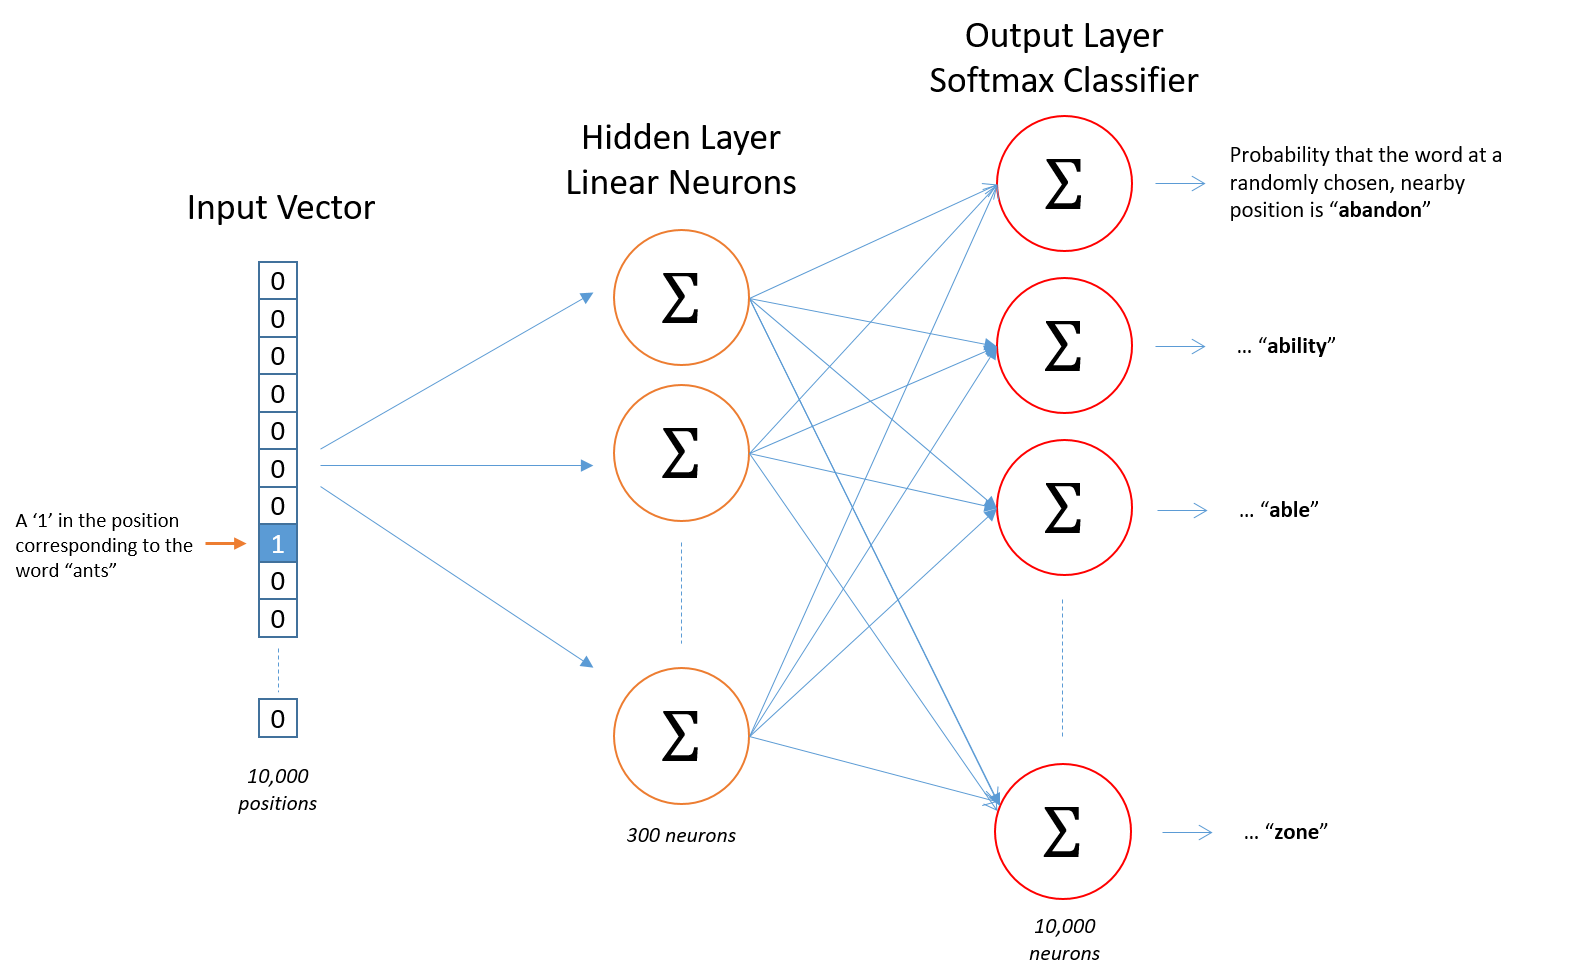

In [ ]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec


s = 'natural language processing nlp is science and artificial intelligence.'

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
	
	# tokenize the sentence into words
for j in word_tokenize(i):
    temp.append(j.lower())

data.append(temp)
data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['natural',
  'language',
  'processing',
  'nlp',
  'is',
  'science',
  'and',
  'artificial',
  'intelligence',
  '.']]

In [ ]:
model1 = gensim.models.Word2Vec(sentences=data, size=8, window=5, min_count=1, workers=4)
print(model1.wv.get_vector("natural"))
# Print results
print("Cosine similarity between 'artificial' " +
			"and 'intelligence' - CBOW : ",
	model1.wv.similarity('artificial', 'intelligence'))
	
print("Cosine similarity between 'artificial' " +
				"and 'natural' - CBOW : ",
	model1.wv.similarity('artificial', 'natural'))


[ 0.05975104 -0.04780001  0.00488454  0.00823177 -0.0047912   0.00889586
 -0.02640836 -0.00803783]
Cosine similarity between 'artificial' and 'intelligence' - CBOW :  0.17757066
Cosine similarity between 'artificial' and 'natural' - CBOW :  0.12620403


In [ ]:
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100,
											window = 5)

# Print results
print("Cosine similarity between 'artificial' " +
			"and 'intelligence' - CBOW : ",
	model2.wv.similarity('artificial', 'intelligence'))
	
print("Cosine similarity between 'artificial' " +
				"and 'natural' - CBOW : ",
	model2.wv.similarity('artificial', 'natural'))

Cosine similarity between 'artificial' and 'intelligence' - CBOW :  0.10926969
Cosine similarity between 'artificial' and 'natural' - CBOW :  -0.24665631


In [ ]:
from gensim.models import Word2Vec
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(min_count=1)
#model.wv.similarity("meow", "woof")
model.build_vocab(sentences)  # prepare the model vocabulary
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)  # train word vectors
(1, 30)
model.wv.similarity("meow", "woof")

-0.00956363

In [ ]:
#Implement Skip-gram model

import numpy as np
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
  
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
  
class word2vec(object):
    def __init__(self):
        self.N = 10
        self.X_train = []
        self.y_train = []
        self.window_size = 2
        self.alpha = 0.001
        self.words = []
        self.word_index = {}
  
    def initialize(self,V,data):
        self.V = V
        self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N))
        self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V))
          
        self.words = data
        for i in range(len(data)):
            self.word_index[data[i]] = i
  
      
    def feed_forward(self,X):
        self.h = np.dot(self.W.T,X).reshape(self.N,1)
        self.u = np.dot(self.W1.T,self.h)
        #print(self.u)
        self.y = softmax(self.u) 
        return self.y
          
    def backpropagate(self,x,t):
        e = self.y - np.asarray(t).reshape(self.V,1)
        # e.shape is V x 1
        dLdW1 = np.dot(self.h,e.T)
        X = np.array(x).reshape(self.V,1)
        dLdW = np.dot(X, np.dot(self.W1,e).T)
        self.W1 = self.W1 - self.alpha*dLdW1
        self.W = self.W - self.alpha*dLdW
          
    def train(self,epochs):
        for x in range(1,epochs):       
            self.loss = 0
            for j in range(len(self.X_train)):
                self.feed_forward(self.X_train[j])
                self.backpropagate(self.X_train[j],self.y_train[j])
                C = 0
                for m in range(self.V):
                    if(self.y_train[j][m]):
                        self.loss += -1*self.u[m][0]
                        C += 1
                self.loss += C*np.log(np.sum(np.exp(self.u)))
            print("epoch ",x, " loss = ",self.loss)
            self.alpha *= 1/( (1+self.alpha*x) )
             
    def predict(self,word,number_of_predictions):
        if word in self.words:
            index = self.word_index[word]
            X = [0 for i in range(self.V)]
            X[index] = 1
            prediction = self.feed_forward(X)
            output = {}
            for i in range(self.V):
                output[prediction[i][0]] = i
              
            top_context_words = []
            for k in sorted(output,reverse=True):
                top_context_words.append(self.words[output[k]])
                if(len(top_context_words)>=number_of_predictions):
                    break
      
            return top_context_words
        else:
            print("Word not found in dictionary")
def preprocessing(corpus):
	stop_words = set(stopwords.words('english'))
	training_data = []
	sentences = corpus.split(".")
	for i in range(len(sentences)):
		sentences[i] = sentences[i].strip()
		sentence = sentences[i].split()
		x = [word.strip(string.punctuation) for word in sentence
									if word not in stop_words]
		x = [word.lower() for word in x]
		training_data.append(x)
	return training_data
	

def prepare_data_for_training(sentences,w2v):
	data = {}
	for sentence in sentences:
		for word in sentence:
			if word not in data:
				data[word] = 1
			else:
				data[word] += 1
	V = len(data)
	data = sorted(list(data.keys()))
	vocab = {}
	for i in range(len(data)):
		vocab[data[i]] = i
	
	#for i in range(len(words)):
	for sentence in sentences:
		for i in range(len(sentence)):
			center_word = [0 for x in range(V)]
			center_word[vocab[sentence[i]]] = 1
			context = [0 for x in range(V)]
			
			for j in range(i-w2v.window_size,i+w2v.window_size):
				if i!=j and j>=0 and j<len(sentence):
					context[vocab[sentence[j]]] += 1
			w2v.X_train.append(center_word)
			w2v.y_train.append(context)
	w2v.initialize(V,data)

	return w2v.X_train,w2v.y_train
corpus = ""
corpus += "The earth revolves around the sun. The moon revolves around the earth"
epochs = 1000

training_data = preprocessing(corpus)
w2v = word2vec()

prepare_data_for_training(training_data,w2v)
w2v.train(epochs)




In [ ]:
print(w2v.predict("around",3))

['earth', 'revolves', 'moon']


Q) In NLP, The algorithm decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents
a. Term Frequency (TF)
b. Inverse Document Frequency (IDF)
c. Word2Vec
d. Latent Dirichlet Allocation (LDA)

##Using WordNet

## WordNet
WordNet® is a large lexical database of English. 
First, WordNet interlinks not just word forms—strings of letters—but specific senses of words. As a result, words that are found in close proximity to one another in the network are semantically disambiguated. Second, WordNet labels the semantic relations among words.

In [ ]:
!pip install nltk
import nltk
#nltk.download('wordnet')
nltk.download()
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn


In [ ]:
word=wn.synsets("program")
print(word[0].definition())

a series of steps to be carried out or goals to be accomplished


In [ ]:
print(word[0].examples())

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [ ]:

print(word[0].lemmas()[0].name())

plan


In [ ]:
w1 = wn.synset('ship.n.01')
w2 = wn.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


In [ ]:
w1 = wn.synset('ship.n.01')
w2 = wn.synset('sheep.n.01')
print(w1.wup_similarity(w2))

0.2962962962962963


## GLOVE Embeddings
GloVe (Global Vector for Word Representation) is an unsupervised learning algorithm for obtaining vector representations for words.
The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus.

As one might expect, ice co-occurs more frequently with solid than it does with gas, whereas steam co-occurs more frequently with gas than it does with solid. Both words co-occur with their shared property water frequently, and both co-occur with the unrelated word fashion infrequently. Only in the ratio of probabilities does noise from non-discriminative words like water and fashion cancel out, so that large values (much greater than 1) correlate well with properties specific to ice, and small values (much less than 1) correlate well with properties specific of steam.

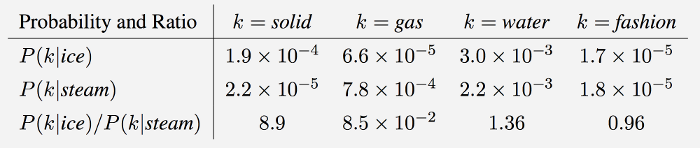

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-07-30 16:27:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-30 16:27:38--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-30 16:27:38--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip
!ls
!pwd

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data
/content


In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('/content/glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [ ]:
u=embeddings_index['program']
norm_u = np.linalg.norm(u)
similarity=[]
for word in embeddings_index.keys():
    v=embeddings_index[word]
    cosine = np.dot(u,v)/norm_u/np.linalg.norm(v)
    similarity.append((word,cosine))
print(len(similarity))
sorted(similarity,key= lambda x: x[1],reverse=True)[:10]



400000


[('program', 0.99999994),
 ('programs', 0.9071443),
 ('programme', 0.7875009),
 ('project', 0.7505014),
 ('funding', 0.7270174),
 ('plan', 0.71068203),
 ('system', 0.6989038),
 ('plans', 0.6961886),
 ('education', 0.69365185),
 ('programmes', 0.68979746)]

Q) Which of the following techniques can be used to compute the distance between two-word vectors in NLP?
a. Lemmatization
b. Euclidean distance
c. Cosine Similarity
d. N-grams


## BERT (Bidirectional Encoder Representations from Transformers)

BERT (Bidirectional Encoder Representations from Transformers) is a recent paper published by researchers at Google AI Language. It has caused a stir in the Machine Learning community by presenting state-of-the-art results in a wide variety of NLP tasks, including Question Answering (SQuAD v1.1), Natural Language Inference (MNLI), and others.

BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling.

BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary.

 A massive dataset of 3.3 Billion words has contributed to BERT’s continued success.

BERT was specifically trained on Wikipedia (2.5B words) and Google’s BooksCorpus (~800M words).

 23 smaller BERT models were released in March 2020. DistilBERT offers a lighter version of BERT; runs 60% faster while maintaining over 95% of BERT’s performance.

 **Masked Language Model: **
 MLM enables/enforces bidirectional learning from text by masking (hiding) a word in a sentence and forcing BERT to bidirectionally use the words on either side of the covered word to predict the masked word.

e.g., NLP is a [MASK] of Artificial Intelligence.
field (0.124), type(0.113), form (0.108), branch (0.104)

 **NSP (Next Sentence Prediction)** 
 It is used to help BERT learn about relationships between sentences by predicting if a given sentence follows the previous sentence or not.

 Paul went shopping. He bought a new shirt. (correct sentence pair)
Ramona made coffee. Vanilla ice cream cones for sale. (incorrect sentence pair)

In [ ]:
!pip install transformers
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')

In [ ]:
unmasker("Artificial Intelligence [MASK] take over the world.")

[{'score': 0.31824034452438354,
  'sequence': 'artificial intelligence can take over the world.',
  'token': 2064,
  'token_str': 'can'},
 {'score': 0.1829964816570282,
  'sequence': 'artificial intelligence will take over the world.',
  'token': 2097,
  'token_str': 'will'},
 {'score': 0.05600164458155632,
  'sequence': 'artificial intelligence to take over the world.',
  'token': 2000,
  'token_str': 'to'},
 {'score': 0.04519513249397278,
  'sequence': 'artificial intelligences take over the world.',
  'token': 2015,
  'token_str': '##s'},
 {'score': 0.04515312612056732,
  'sequence': 'artificial intelligence would take over the world.',
  'token': 2052,
  'token_str': 'would'}]

In [ ]:
unmasker("The man worked as a [MASK].")

[{'score': 0.09747567027807236,
  'sequence': 'the man worked as a carpenter.',
  'token': 10533,
  'token_str': 'carpenter'},
 {'score': 0.05238332226872444,
  'sequence': 'the man worked as a waiter.',
  'token': 15610,
  'token_str': 'waiter'},
 {'score': 0.049626946449279785,
  'sequence': 'the man worked as a barber.',
  'token': 13362,
  'token_str': 'barber'},
 {'score': 0.0378861278295517,
  'sequence': 'the man worked as a mechanic.',
  'token': 15893,
  'token_str': 'mechanic'},
 {'score': 0.03768080845475197,
  'sequence': 'the man worked as a salesman.',
  'token': 18968,
  'token_str': 'salesman'}]

In [ ]:
unmasker("The woman worked as a [MASK].")

[{'score': 0.21981488168239594,
  'sequence': 'the woman worked as a nurse.',
  'token': 6821,
  'token_str': 'nurse'},
 {'score': 0.15974114835262299,
  'sequence': 'the woman worked as a waitress.',
  'token': 13877,
  'token_str': 'waitress'},
 {'score': 0.1154731884598732,
  'sequence': 'the woman worked as a maid.',
  'token': 10850,
  'token_str': 'maid'},
 {'score': 0.03796885535120964,
  'sequence': 'the woman worked as a prostitute.',
  'token': 19215,
  'token_str': 'prostitute'},
 {'score': 0.030423814430832863,
  'sequence': 'the woman worked as a cook.',
  'token': 5660,
  'token_str': 'cook'}]

Q) In NLP, Bidirectional context is supported by which of the following embedding
a. Word2Vec
b. BERT
c. GloVe
d. All the above

# Word Operations
## Tokenizer

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello dear students, how are you doing today? The weather is great, and Python is awesome. Hope you are focussing on the class."

print(sent_tokenize(EXAMPLE_TEXT))
print(word_tokenize(EXAMPLE_TEXT))

['Hello dear students, how are you doing today?', 'The weather is great, and Python is awesome.', 'Hope you are focussing on the class.']
['Hello', 'dear', 'students', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'Hope', 'you', 'are', 'focussing', 'on', 'the', 'class', '.']


## POS Tagging
Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.



Part of Speech	Tag

Noun	N

Verb	V

Adjective	ADJ

Adverb	ADV

Preposition	P

Conjunction	CON

Pronoun	PRO

Interjection	INT

**More Tags**

CC coordinating conjunction

CD cardinal digit

DT determiner

EX existential there (like: “there is” … think of it like “there exists”)

FW foreign word

IN preposition/subordinating conjunction

JJ adjective ‘big’

JJR adjective, comparative ‘bigger’

JJS adjective, superlative ‘biggest’

LS list marker

MD modal could, will

NN noun, singular ‘desk’

NNS noun plural ‘desks’

NNP proper noun, singular ‘Harrison’

NNPS proper noun, plural ‘Americans’

PDT predeterminer ‘all the kids’

POS possessive ending parent’s

PRP personal pronoun I, he, she

PRP$ possessive pronoun my, his, hers

RB adverb very, silently,

RBR adverb, comparative better

RBS adverb, superlative best

RP particle give up

TO, to go ‘to’ the store.

UH interjection, errrrrrrrm

VB verb, base form take

VBD verb, past tense took

VBG verb, gerund/present participle taking

VBN verb, past participle taken

VBP verb, sing. present, non-3d take

VBZ verb, 3rd person sing. present takes

WDT wh-determiner which

WP wh-pronoun who, what

WP$ possessive wh-pronoun whose

WRB wh-abverb where, when

In [ ]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

In [ ]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = custom_sent_tokenizer.tokenize(sample_text)

In [ ]:
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))


process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

## Stop words Removal

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


## NER Tagging

In [ ]:
import spacy
from spacy import displacy
ner_pipeline = spacy.load("en_core_web_sm")
ner_pipeline_labels = ner_pipeline.get_pipe("ner").labels
ner_pipeline_labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [ ]:
sample_text = """ The company was founded in December 2002 by Reid Hoffman and the founding team members from PayPal and Socialnet.com (Allen Blue, Eric Ly, Jean-Luc Vaillant, Lee Hower, Konstantin Guericke, Stephen Beitzel, David Eves, Ian McNish, Yan Pujante, Chris Saccheri).In late 2003, Sequoia Capital led the Series A investment in the company.In August 2004, LinkedIn reached 1 million users.In March 2006, LinkedIn achieved its first month of profitability.In April 2007, LinkedIn reached 10 million users.In February 2008, LinkedIn launched a mobile version of the site.

In June 2008, Sequoia Capital, Greylock Partners, and other venture capital firms purchased a 5% stake in the company for $53 million, giving the company a post-money valuation of approximately $1 billion. In November 2009, LinkedIn opened its office in Mumbai and soon thereafter in Sydney, as it started its Asia-Pacific team expansion. In 2010 LinkedIn opened an International Headquarters in Dublin, Ireland,received a $20 million investment from Tiger Global Management LLC at a valuation of approximately $2 billion,announced its first acquisition, Mspoke,and improved its 1% premium subscription ratio. In October of that year, Silicon Valley Insider ranked the company No. 10 on its Top 100 List of most valuable startups. By December, the company was valued at $1.575 billion in private markets. LinkedIn started its India operations in 2009 and a major part of the first year was dedicated to understanding professionals in India and educating members to leverage LinkedIn for career development.

LinkedIn office building at 222 Second Street in San Francisco (opened in March 2016)

LinkedIn office in Toronto inside the Toronto Eaton Centre

LinkedIn filed for an initial public offering in January 2011."""

len(sample_text.split('.'))
ner_text = ner_pipeline(sample_text)
for word in ner_text.ents:
    print(word.text,word.label_,word.start_char, word.end_char)

December 2002 DATE 28 41
Reid Hoffman PERSON 45 57
PayPal ORG 93 99
Socialnet.com ORG 104 117
Allen Blue PERSON 119 129
Eric Ly PERSON 131 138
Jean-Luc Vaillant PERSON 140 157
Lee Hower PERSON 159 168
Konstantin Guericke PERSON 170 189
Stephen Beitzel PERSON 191 206
David Eves PERSON 208 218
Ian McNish PERSON 220 230
Yan Pujante PERSON 232 243
Chris PERSON 245 250
late 2003 DATE 264 273
Sequoia Capital ORG 275 290
August 2004 DATE 337 348
LinkedIn ORG 350 358
1 million CARDINAL 367 376
March 2006 DATE 386 396
LinkedIn ORG 398 406
first month DATE 420 431
April 2007 DATE 452 462
10 million CARDINAL 481 491
February 2008 DATE 501 514
June 2008 DATE 568 577
Sequoia Capital ORG 579 594
Greylock Partners ORG 596 613
5% PERCENT 659 661
$53 million MONEY 687 698
approximately $1 billion MONEY 745 769
November 2009 DATE 774 787
LinkedIn ORG 789 797
Mumbai GPE 819 825
Sydney GPE 849 855
Asia LOC 875 879
2010 DATE 907 911
an International Headquarters EVENT 928 957
Dublin GPE 961 967
Ireland GPE

In [ ]:
displacy.render(ner_text,style="ent",jupyter=True)

Stemming, the simpler of the two, groups words by their root stem. This allows us to recognize that ‘jumping’ ‘jumps’ and ‘jumped’ are all rooted to the same verb (jump) and thus are referring to similar problems.

Lemmatization, on the other hand, groups words based on root definition, and allows us to differentiate between present, past, and indefinite.

In [ ]:
#Stemming
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

words = ["jump", "jumped", "jumps", "jumping"]
stemmer = PorterStemmer()
for word in words:
    print(word + " = " + stemmer.stem(word))

jump = jump
jumped = jump
jumps = jump
jumping = jump


In [ ]:
#Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

words = ["jump", "jumped", "jumps", "jumping"]
lemmatizer = WordNetLemmatizer()
for word in words:
    print(word + " = " + lemmatizer.lemmatize(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


jump = jump
jumped = jumped
jumps = jump
jumping = jumping


In [ ]:
%%shell
jupyter nbconvert --to html ///content/sample_data/WordRepresentations.ipynb

[NbConvertApp] Converting notebook ///content/sample_data/WordRepresentations.ipynb to html
[NbConvertApp] Writing 1200277 bytes to ///content/sample_data/WordRepresentations.html


Q) In NLP, The process of converting a sentence or paragraph into tokens is referred to as Stemming
a. True
b. False